In [1]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from pyod.models.abod import ABOD
import numpy as np

In [2]:
# 2 boyutlu 150 adet veri ürettik bunlardan yüzde 10'u ayrıkı veri olarak ayarlı.
X_train, Y_train = generate_data(n_train=150, n_features=2, train_only=True, contamination=0.1,random_state=42)

In [3]:
x1, x2 = X_train[:,0], X_train[:,1]

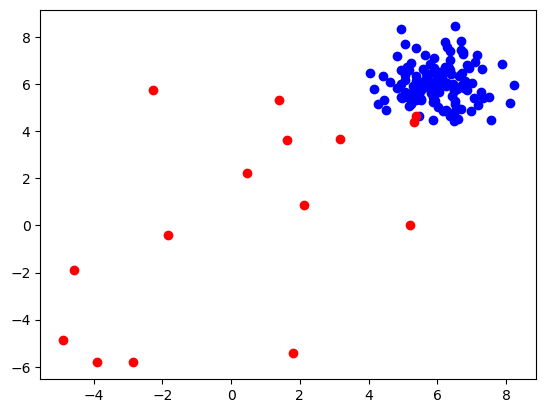

In [4]:
for idx, i in enumerate(Y_train):
  if i==0.0: 
    color='blue'
  else: 
    color='red'
  plt.scatter(x1[idx], x2[idx], c=color)

In [5]:
# Mavi noktaların 2 boyutlu olduğu için x1 ve x2'lerini ayrı ayrı istatistiksel değerlerini alıyoruz.

inline_indices = [idx for idx, i in enumerate(Y_train) if i == 0.0]
inline_x1 = [x1[idx] for idx in inline_indices]
inline_x2 = [x2[idx] for idx in inline_indices]

inline_mean_x1 = np.mean(inline_x1)
inline_mean_x2 = np.mean(inline_x2)
inline_std_x1 = np.std(inline_x1)
inline_std_x2 = np.std(inline_x2)
inline_median_x1 = np.median(inline_x1)
inline_median_x2 = np.median(inline_x2)
inline_var_x1 = np.var(inline_x1)
inline_var_x2 = np.var(inline_x2)

In [6]:
abod_model = ABOD(contamination=0.1, method='fast', n_neighbors=10)
abod_model.fit(X_train)

ABOD(contamination=0.1, method='fast', n_neighbors=10)

In [7]:
pred = abod_model.predict(X_train)

In [8]:
error = (pred != Y_train).sum()
print (f'Error % = {(error/len(pred))*100}')

Error % = 2.666666666666667


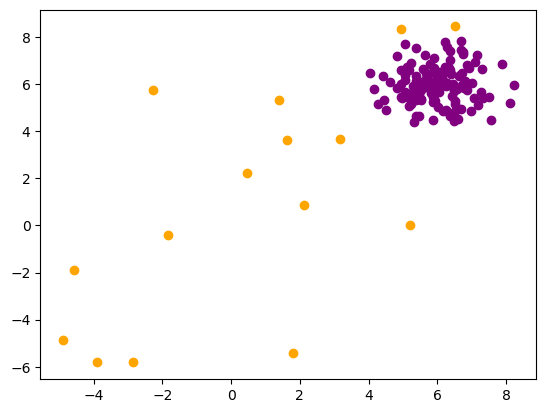

In [9]:
for idx, i in enumerate(pred):
  if i==0.0: 
    color='purple'
  else: 
    color='orange'
  plt.scatter(x1[idx], x2[idx], c=color)

In [10]:
#Düzenlenmiş veride ki mor renkteki noktaların 2 boyutlu olduğu için x1 ve x2'lerini ayrı ayrı istatistiksel değerlerini alıyoruz.

inline_indices_pred = [idx for idx, i in enumerate(pred) if i == 0.0]
inline_x1_pred = [x1[idx] for idx in inline_indices_pred]
inline_x2_pred = [x2[idx] for idx in inline_indices_pred]

inline_mean_x1_pred = np.mean(inline_x1_pred)
inline_mean_x2_pred = np.mean(inline_x2_pred)
inline_std_x1_pred = np.std(inline_x1_pred)
inline_std_x2_pred = np.std(inline_x2_pred)
inline_median_x1_pred = np.median(inline_x1_pred)
inline_median_x2_pred = np.median(inline_x2_pred)
inline_var_x1_pred = np.var(inline_x1_pred)
inline_var_x2_pred = np.var(inline_x2_pred)

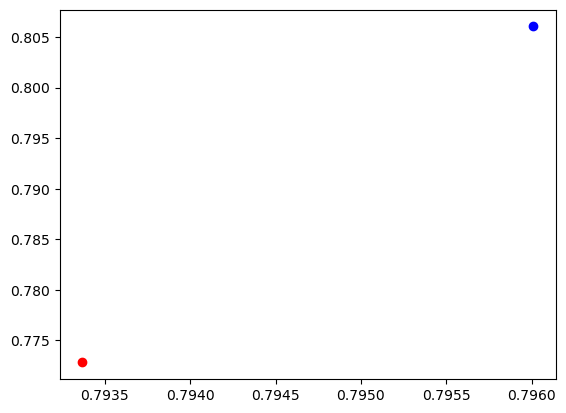

In [11]:
# Standart Sapma değerlerin kaşılaştırılması
plt.scatter(inline_std_x1, inline_std_x2, c='blue')
plt.scatter(inline_std_x1_pred, inline_std_x2_pred, c='red')

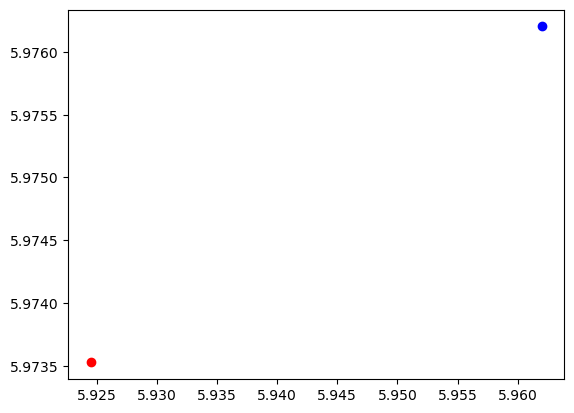

In [13]:
# Medyan değerlerin kaşılaştırılması
plt.scatter(inline_median_x1, inline_median_x2, c='blue')
plt.scatter(inline_median_x1_pred, inline_median_x2_pred, c='red')

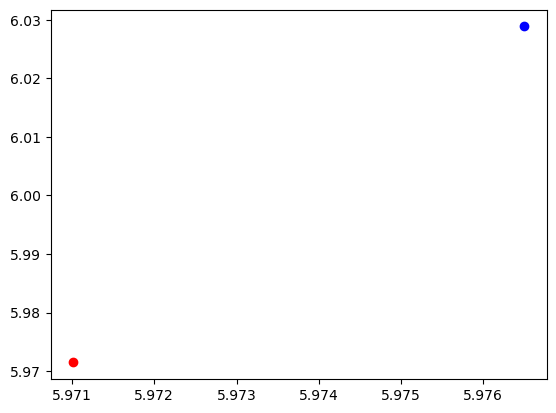

In [14]:
# Ortalama değerlerin kaşılaştırılması
plt.scatter(inline_mean_x1, inline_mean_x2, c='blue')
plt.scatter(inline_mean_x1_pred, inline_mean_x2_pred, c='red')

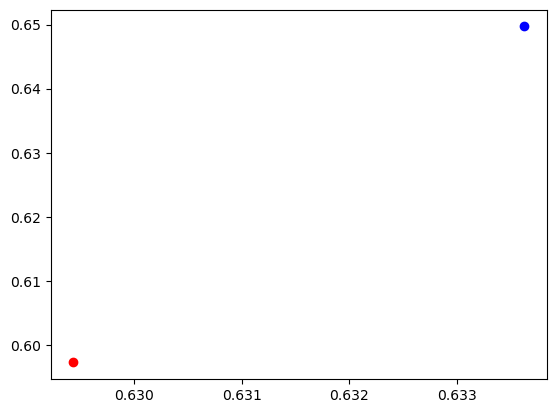

In [15]:
# Varyans değerlerin kaşılaştırılması
plt.scatter(inline_var_x1, inline_var_x2, c='blue')
plt.scatter(inline_var_x1_pred, inline_var_x2_pred, c='red')